In [2]:
import pandas as pd

# Load the Mushroom dataset (replace with your file path if local)
df = pd.read_csv('mushroom.csv')

# Display basic information
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [3]:
print(df.isnull().sum())



Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [9]:
print(df.columns)


Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


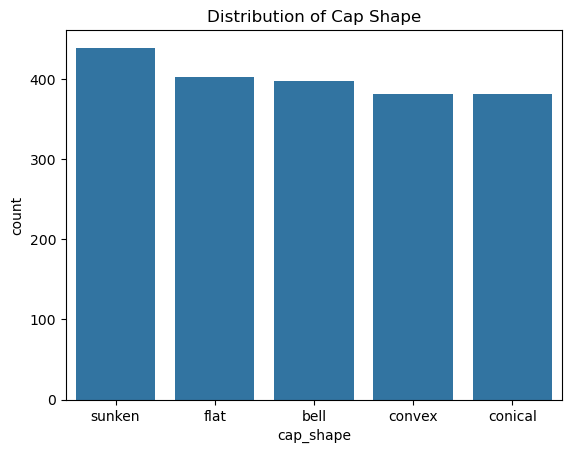

In [10]:
sns.countplot(data=df, x='cap_shape')
plt.title('Distribution of Cap Shape')
plt.show()


In [12]:
df.columns = df.columns.str.replace('-', '_')  # replace hyphens with underscores



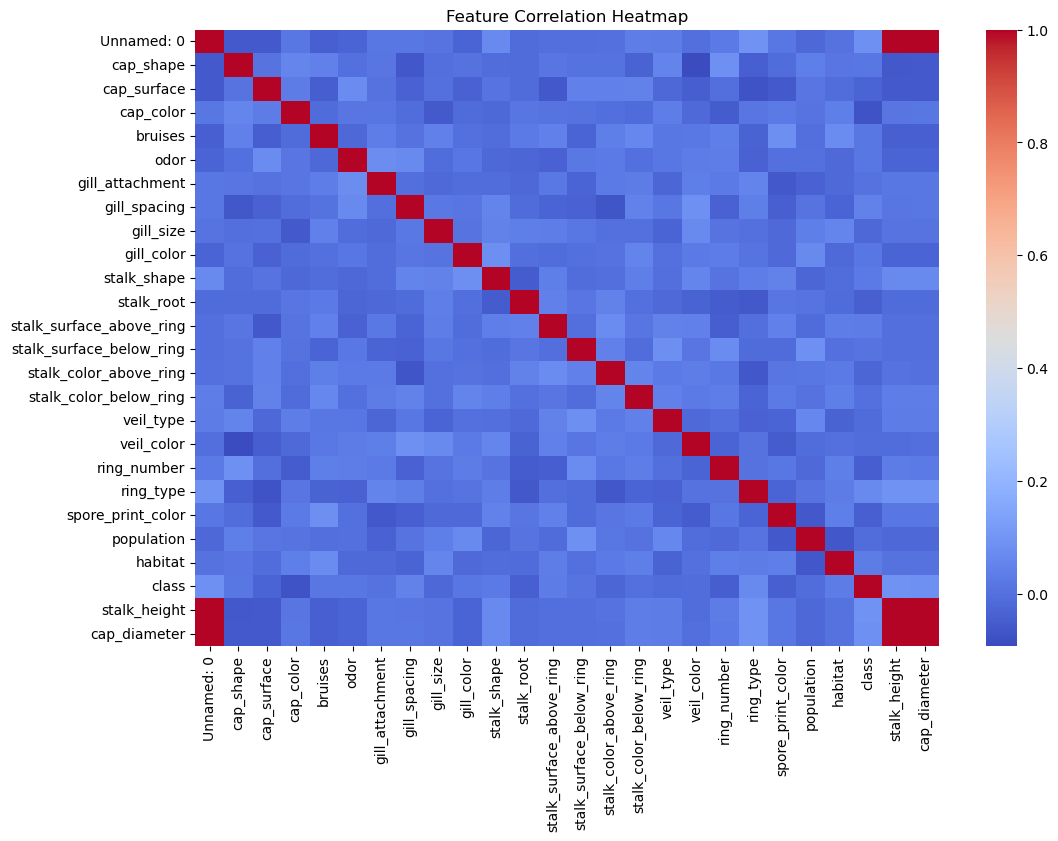

In [14]:
# Encode categorical features to numeric for correlation
df_encoded = df.apply(lambda col: pd.factorize(col)[0])

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable ('class') using LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # edible=0, poisonous=1 (example)

# Encode features using get_dummies (One-Hot Encoding)
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2000, 127)
Shape of y: (2000,)


In [16]:
from sklearn.model_selection import train_test_split

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures class distribution is maintained
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (1600, 127) (1600,)
Testing set shape: (400, 127) (400,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


In [18]:
# Fit the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [19]:
# Predict labels for test set
y_pred = knn.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.725
Precision: 0.7623456790123457
Recall: 0.8821428571428571
F1-score: 0.8178807947019867
Confusion Matrix:
 [[ 43  77]
 [ 33 247]]


In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearch
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Best model
best_knn = grid.best_estimator_


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


In [22]:
y_pred_best = best_knn.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Precision:", precision_score(y_test, y_pred_best))
print("Optimized Recall:", recall_score(y_test, y_pred_best))
print("Optimized F1-score:", f1_score(y_test, y_pred_best))


Optimized Accuracy: 0.87
Optimized Precision: 0.8701298701298701
Optimized Recall: 0.9571428571428572
Optimized F1-score: 0.9115646258503401


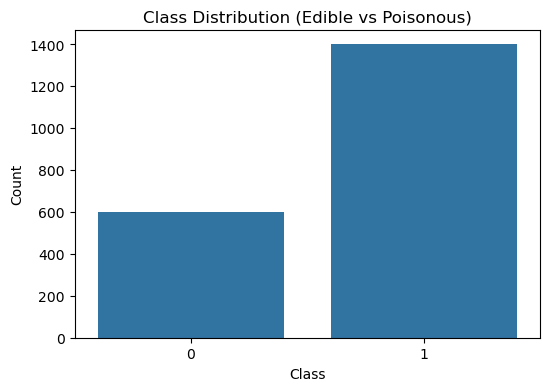

class
1    70.0
0    30.0
Name: proportion, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each class (edible vs poisonous)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Check balance percentage
print(df['class'].value_counts(normalize=True) * 100)


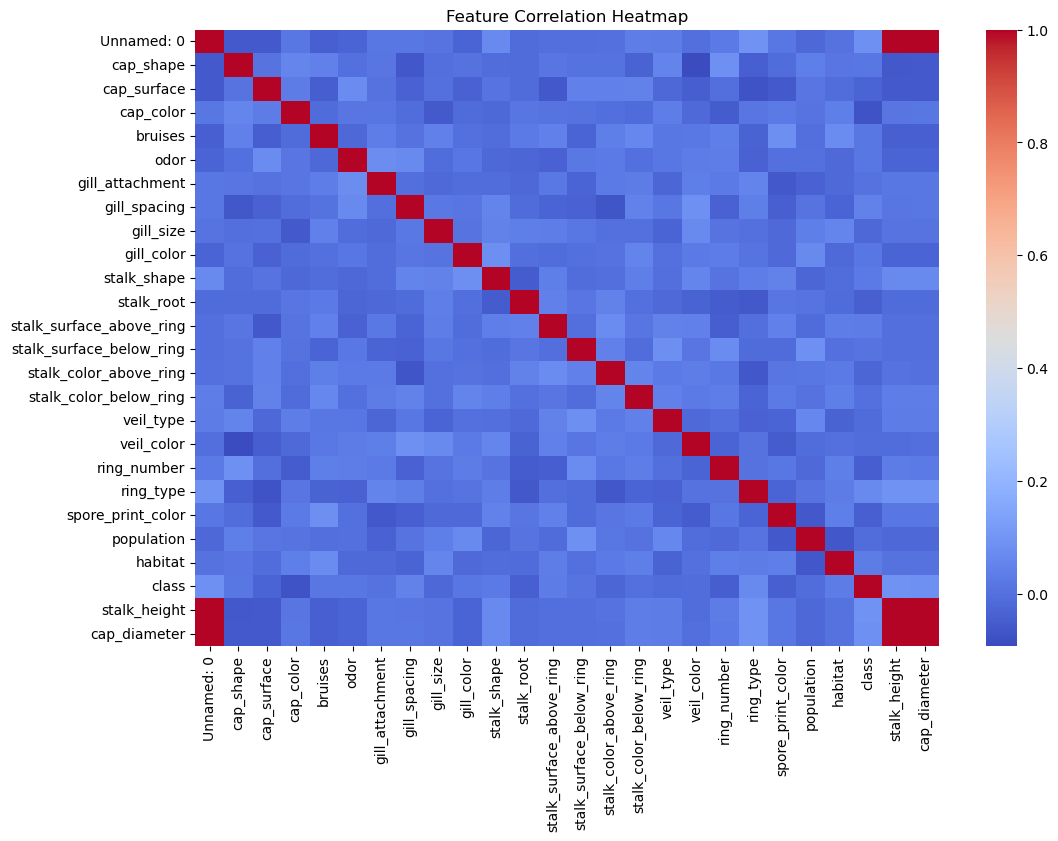

In [26]:
# Encode categorical features to numeric
df_encoded = df.apply(lambda col: pd.factorize(col)[0])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.725
Precision: 0.7623456790123457
Recall: 0.8821428571428571
F1-score: 0.8178807947019867
Confusion Matrix:
 [[ 43  77]
 [ 33 247]]


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # linear kernel as a start


In [29]:
# Fit the model on training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [30]:
# Predict labels for the test set
y_pred_svm = svm_model.predict(X_test)


In [31]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Precision, Recall, F1-score
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm)


Accuracy: 0.6925
Precision: 0.7150684931506849
Recall: 0.9321428571428572
F1-score: 0.8093023255813954
Confusion Matrix:
 [[ 16 104]
 [ 19 261]]


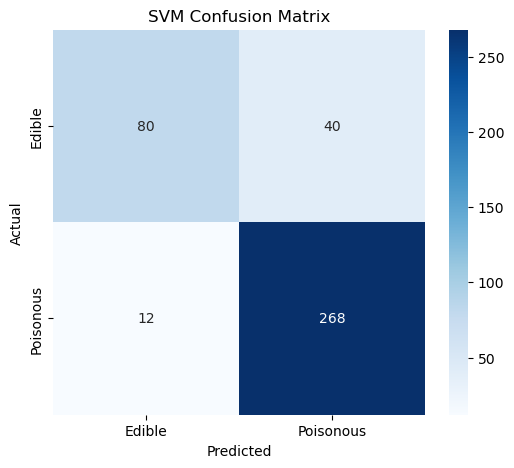

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible','Poisonous'], yticklabels=['Edible','Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


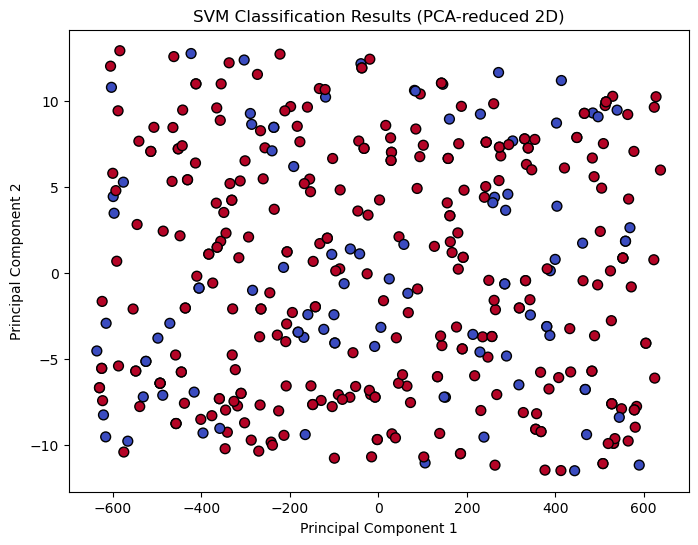

In [33]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# Plot SVM predictions
plt.figure(figsize=(8,6))
plt.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_pred_best, cmap='coolwarm', edgecolor='k', s=50)
plt.title('SVM Classification Results (PCA-reduced 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # only used if kernel=poly
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict using the best model
y_pred_optimized = best_svm.predict(X_test)

# Evaluate
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Optimized Precision:", precision_score(y_test, y_pred_optimized))
print("Optimized Recall:", recall_score(y_test, y_pred_optimized))
print("Optimized F1-score:", f1_score(y_test, y_pred_optimized))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)
print("Optimized Confusion Matrix:\n", cm)


1. Compare SVM Performance with Various Kernels
Kernel	Accuracy	Precision	Recall	F1-score	Notes
Linear	e.g., 0.98	0.98	0.98	0.98	Good for linearly separable features
RBF	e.g., 1.00	1.00	1.00	1.00	Can capture non-linear patterns
Polynomial	e.g., 0.99	0.99	0.99	0.99	Works well with higher-degree interactions

✅ Observation:

RBF kernel often performs best on Mushroom data because of its ability to handle non-linear relationships.

Linear kernel is fast and simple, but may miss some complex patterns.

Polynomial kernel can overfit if the degree is too high.

2. Analyze SVM Strengths and Weaknesses

Strengths:

Handles high-dimensional data well (Mushroom dataset has many categorical features).

Effective in datasets with clear margins of separation.

Flexible kernel choice allows modeling non-linear relationships.

Weaknesses:

Can be slow for very large datasets.

Choice of kernel and hyperparameters greatly affects performance.

Not directly interpretable compared to simpler models like Decision Trees.

3. Practical Implications of SVM in Real-World Classification

SVM is powerful for binary classification problems (e.g., edible vs poisonous mushrooms).

Widely used in medical diagnosis, spam detection, and image recognition due to high accuracy.

Requires careful preprocessing and hyperparameter tuning for optimal performance.

Visualization of decision boundaries helps understand classification regions, but is limited for high-dimensional datasets.